### AGN Photometry: UV-IR Color Relations & Automation

This research project involves the analysis of 27 Active Galactic Nuclei (AGN) sources with Ultraviolet (UV) data obtained from a pipeline in various filters. The primary objective was to reproduce the pipeline data using the Swift UVOT software and its diverse methods. However, discrepancies between the measured magnitudes and the original pipeline data were observed, indicating potential differences in aperture sizes.

To address this issue, a Curve of Growth model was employed, where magnitudes were measured for various aperture sizes to study how the magnitude changes with aperture radius. The count rates increased with the aperture radius until reaching a plateau, signifying the inclusion of more background and less of the source beyond a certain radius. Comparison of the Curve of Growth model with the pipeline data demonstrated that the pipeline magnitude values were approached with an increase in aperture radius.

The project further involved comparing the UV data with the Infrared (IR) magnitudes obtained from the Two Micron All Sky Survey for all aperture radii. This comparison provided valuable insights into the star formation rates of galaxies. The difference between the UV and IR magnitudes, along with the corresponding color, served as an indicator of star formation rates. 

An ultimate goal of this project was to automate the entire photometry process to streamline data analysis and ensure more consistent and reliable results. Automating the photometry process would enhance efficiency and reproducibility, allowing for larger sample sizes to be analyzed systematically.

#### Background

- Active Galactic Nuclei (AGN) - AGNs are highly luminous regions in galaxies with supermassive black holes, emitting radiation across the electromagnetic spectrum. AGNs play a crucial role in galaxy evolution and are believed to influence the formation and growth of galaxies.
- Ultraviolet (UV) Filters: UVM2, UVW1, and UVW2 are commonly used UV filters in astronomy to study AGNs' high-energy processes.
- Infrared (IR) Filters: JHK filters from 2MASS are used to observe AGNs and galaxies in longer wavelengths, tracing obscured regions and probing star formation.

#### Motivation

- Studying the UV and IR wavelengths emitted by AGNs and galaxies provides crucial insights into their properties and evolution.
- The UV region helps detect young stars and intense AGN activity, while the IR region traces warm dust emission linked to star formation rates.

#### Methodology

1) SWIFT UVOT Software
- Select appropriate aperture radii for photometry and choose background regions for accurate background subtraction.
- Run the uvotsource method for aperture photometry.
2) Curve of Growth Model
- Measure magnitudes for increasing aperture radii.
- Plot count rates against aperture radii to construct the curve of growth model.

#### Import Modules

In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import os

#### Get a List of Obs IDs

In [2]:
directory = os.fsencode('/mnt/home/guptaagr/AGN-Photometry/swift27/')
directories = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename[0]!='0':
        continue
    else:
        directories.append(filename)
directories=sorted(directories)

#### Plot the Curve of Growth Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

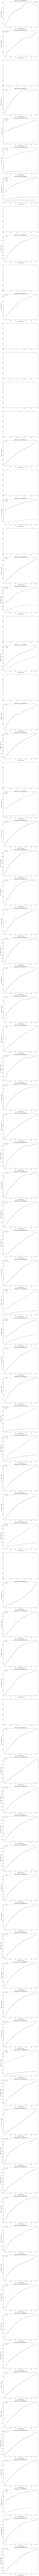

In [3]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Calculate the number of plots needed based on the number of observation directories
num_plots = len(directories)

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")[1].data['AP_COI_SRC_RATE'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the count rates for the filter and observation ID in the respective subplot
            axs[i].plot(radii, mags, label=f"{filterr}")
            axs[i].set_title(f"Observation ID: {obs_id}")
            axs[i].set_xlabel('Radius (arcseconds)')
            axs[i].set_ylabel('Count Rate (counts/s)')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### Plot the Curve of Growth Model with Magnitudes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

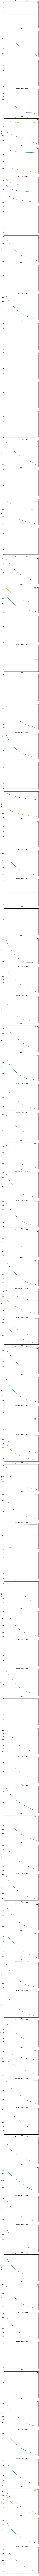

In [4]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Calculate the number of plots needed based on the number of observation directories
num_plots = len(directories)

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots), sharex=True)

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")[1].data['AB_MAG'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the magnitudes for the filter and observation ID in the respective subplot
            axs[i].plot(radii, mags, label=f"{filterr}")
            axs[i].set_title(f"Observation ID: {obs_id}")
            axs[i].set_xlabel('Radius')
            axs[i].set_ylabel('Magnitude')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### UV-IR Color Relations

- Compare UV data with IR magnitudes from the 2MASS survey.
- Analyze color differences between UV and IR magnitudes to understand star formation rates.
- Explore potential connections between AGN activity and star formation.

#### Read and clean SWIFT UV Data

In [5]:
phot = pd.read_csv("All27_UV_OM_Photometry.csv")

In [6]:
phot = phot.drop(['Name.1','RA_decimal','Dec_decimal','V','V_err','V_flux','V_fluxerr','B','B_err','B_flux','B_fluxerr'], axis=1)

In [7]:
phot.head()

Name SWIFT Target ID Exposure     UVM2  UVM2_err     UVM2_flux  \
0  1H0323+342           96107    1,2,3  15.9844     0.050  1.870000e-15   
1         NaN           96107        4  15.9851     0.030  1.870000e-15   
2  1H1934-063           96108        1  14.9353     0.015  4.930000e-15   
3       3C120           96109        1  14.8860     0.015  5.150000e-15   
4       3C382           96110        1  15.3800     0.030  3.260000e-15   

   UVM2_fluxerr     UVW1  UVW1_err     UVW1_flux  UVW1_fluxerr   UVW2  \
0  8.620000e-17  15.5973    0.0260  2.300000e-15  5.560000e-17  15.92   
1  5.950000e-17      NaN       NaN           NaN           NaN  16.10   
2  6.840000e-17  14.3808    0.0149  7.040000e-15  9.720000e-17  14.79   
3  7.310000e-17      NaN       NaN           NaN           NaN    NaN   
4  9.710000e-17      NaN       NaN           NaN           NaN    NaN   

   UVW2_err     UVW2_flux  UVW2_fluxerr     U   U_err        U_flux  \
0     0.015  2.290000e-15  3.070000e-17   NaN     NaN           NaN   
1     0.030  1.950000e-15  5.310000e-17   NaN     NaN           NaN   
2     0.014  6.470000e-15  8.640000e-17  13.5  0.0119  1.410000e-14   
3       NaN           NaN           NaN   NaN     NaN           NaN   
4       NaN           NaN           NaN   NaN     NaN           NaN   

      U_fluxerr  
0           NaN  
1           NaN  
2  1.540000e-16  
3           NaN  
4           NaN

#### Read 2MASS IR Data

In [8]:
two_mass = pd.read_csv("2mass.csv")

#### Plotting UV-IR Magnitudes with Pipeline Magnitude

In [9]:
def mag_plot(obs_id, uv_filter, ir_filter):
    # Get the current working directory
    cdir = os.getcwd()

    # Set up empty lists for storing magnitudes and errors
    mags = []
    errs = []

    # Define the radius values
    radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

    # Loop over the radius values
    for radius in radii:
        # Construct the filepath for the FITS file
        filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius)}00_{obs_id}.fits"

        # Check if the file exists
        if not os.path.exists(filepath):
            raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")

        # Read the FITS file and extract the data
        mag_data = Table(fits.getdata(filepath))

        # Calculate the mean magnitude and error
        mags.append(np.mean(mag_data['MAG']))
        errs.append(np.mean(mag_data['MAG_ERR']))

    # Calculate the index for accessing the 2MASS data
    obs = int(int(obs_id)/1000)
    exp = obs_id[-1]
    idx = obs-96107

    # Define the IR radii
    ir_radii = [5, 7, 10, 15, 20, 25, 30]

    # Initialize lists for storing IR magnitudes and errors
    imags = []
    ierrs = []

    # Loop over the IR radii
    for r in ir_radii:
        imags.append(two_mass.iloc[idx][f'{ir_filter}_m_{r}'])
        ierrs.append(two_mass.iloc[idx][f'{ir_filter}_msig_{r}'])

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(radii, mags, label='SWIFT')
    plt.errorbar(radii, mags, yerr=errs, fmt='o', markersize=5)
    plt.plot(ir_radii, imags, label=f'2MASS {ir_filter.upper()} Band')
    plt.errorbar(ir_radii, imags, yerr=ierrs, fmt='o', markersize=5)

    # Get the pipeline magnitude for the UV filter
    obs_data_old = phot.loc[phot['SWIFT Target ID'] == str(obs)]
    obs_data = obs_data_old[obs_data_old['Exposure'].str.contains(exp)]
    if not obs_data.empty:
        uv_filter_map = {'uw2': 'UVW2', 'uw1': 'UVW1', 'uuu': 'U', 'um2': 'UVM2'}
        pipeline_filter = uv_filter_map[uv_filter]
        pipeline_mag = obs_data[pipeline_filter].values[0]

    # Add the pipeline magnitude as a horizontal line
    plt.axhline(pipeline_mag, linestyle='--', color='purple', label='Pipeline')

    # Set the plot title, labels, and legend
    plt.title(f'{obs_id} {uv_filter.upper()} Filter')
    plt.xlabel('Radius (in arcseconds)')
    plt.ylabel('Magnitude')
    plt.legend()

##### Parameters of mag_plot function

1. Observation ID - Choose from the list of Observation IDs given in the readme file.
2. UV Filter - uvm2, uvw1, uvw2 or uuu
3. IR Filter - j, h or k

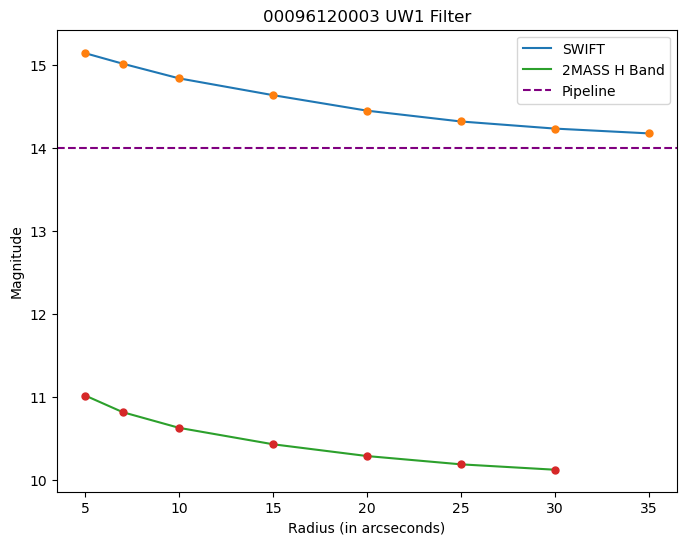

In [10]:
mag_plot('00096120003', 'uw1', 'h')

#### More Aesthetic Plot + Returns both UV and IR Magnitude values with errors

In [29]:
def mag_plot(obs_id, uv_filter, ir_filter):
    # Get current directory
    cdir = os.getcwd()

    # Initialize lists for magnitudes and errors
    mags = np.array([])
    errs = np.array([])

    # Define radii and loop over them
    radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
    for radius in radii:
        filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius)}00_{obs_id}_noapcorr.fits"
        if not os.path.exists(filepath):
            raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")
        maghist = fits.open(filepath)
        mag_data = Table(maghist[1].data)
        mags = np.append(mags, mag_data['AB_MAG'].mean())
        errs = np.append(errs, mag_data['AB_MAG_ERR'].mean())

    # Get index for 2MASS data
    idx = int(int(obs_id) / 1000 - 96107)

    # Define IR radii and loop over them
    ir_radii = [5, 7, 10, 15, 20, 25, 30]
    imags = np.array([])
    ierrs = np.array([])
    for r in ir_radii:
        imags = np.append(imags, two_mass.iloc[idx][[f'{ir_filter}_m_{r}']].values[0])
        ierrs = np.append(ierrs, two_mass.iloc[idx][[f'{ir_filter}_msig_{r}']].values[0])
    if ir_filter=='j':
        imags+=0.89
    elif ir_filter=='h':
        imags=+1.37
    else:
        imags=+1.84

    # Create the figure and axes with a black background
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.set_facecolor('k')

    # Plot SWIFT data with modified red color
    ax.plot(radii, mags, color='#069af3', linestyle='-', marker='o', markersize=5, label='SWIFT')
    ax.errorbar(radii, mags, yerr=errs, fmt='none', ecolor='#069af3', capsize=3)

    # Plot 2MASS data with modified blue color
    ax.plot(ir_radii, imags, color='tomato', linestyle='-', marker='o', markersize=5, label=f'2MASS {ir_filter.upper()} Band')
    ax.errorbar(ir_radii, imags, yerr=ierrs, fmt='none', ecolor='tomato', capsize=3)

    # Add horizontal line for pipeline magnitude with white color
    obs_data = phot.loc[phot['SWIFT Target ID'] == str(int(obs_id) // 1000)]
    if not obs_data.empty:
        uv_filter_map = {'uw2': 'UVW2', 'uw1': 'UVW1', 'uuu': 'U', 'um2': 'UVM2'}
        pipeline_filter = uv_filter_map[uv_filter]
        pipeline_mag = obs_data[pipeline_filter].values[0]
        ax.axhline(pipeline_mag, linestyle='--', color='white', label='Pipeline')

    # Set plot title, axis labels, and legend with white text color
    ax.set_title(f'{obs_id} {uv_filter.upper()} Filter', fontsize=16, color='white')
    ax.set_xlabel('Radius (in arcseconds)', fontsize=12, color='white')
    ax.set_ylabel('Magnitude', fontsize=12, color='white')
    ax.legend(fontsize=10, loc='best')

    # Customize plot aesthetics
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_edgecolor('white')
    ax.spines['left'].set_edgecolor('white')
    ax.tick_params(axis='both', which='both', direction='out', length=5, width=1, color='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_axisbelow(True)

    # Set the figure facecolor to black
    fig.set_facecolor('black')

    # Show the plot
    plt.tight_layout()
#     plt.savefig(f'{obs_id}_{uv_filter}_{ir_filter}')
    plt.show()
    return mags, errs, imags, ierrs

##### Parameters of mag_plot function

1. Observation ID - Choose from the list of Observation IDs given in the readme file.
2. UV Filter - uvm2, uvw1, uvw2 or uuu
3. IR Filter - j, h or k

ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

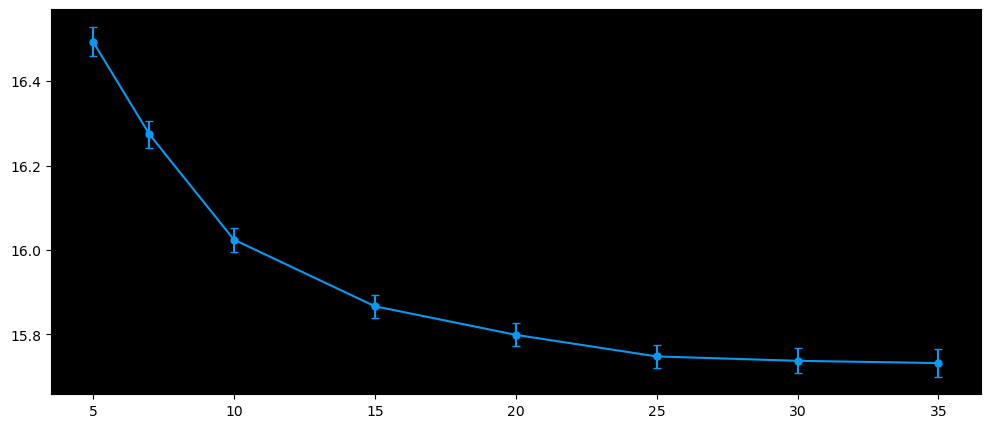

In [30]:
obs_id = '00096108001'
uv_fil = 'uw1'
ir_fil = 'k'
mags, errs, imags, ierrs = mag_plot(obs_id, uv_fil, ir_fil)

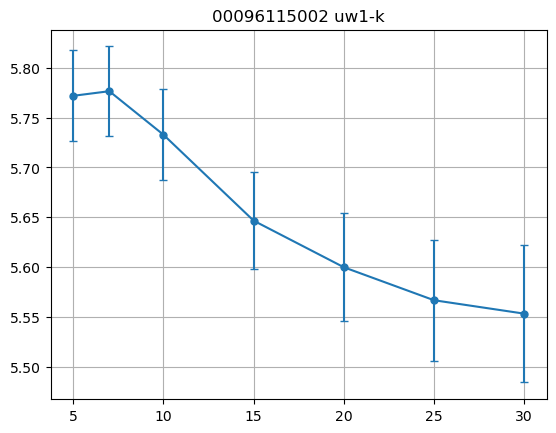

In [14]:
while len(imags)<8:
    imags = np.append(imags,np.nan)
error = np.sqrt(errs[:7]**2+ierrs**2)
while len(error)<8:
    error = np.append(error,np.nan)
diff = mags-imags
plt.plot(radii, diff, linestyle='-', marker='o', markersize=5)
plt.errorbar(radii, diff, yerr=error, fmt='none', capsize=3)
plt.title(f'{obs_id} {uv_fil}-{ir_fil}')
plt.grid()
plt.savefig(f'{obs_id} {uv_fil}-{ir_fil} difference')
# plt.ylim(np.mean(diff)-2,np.mean(diff)+2);

#### Zero-Point Calculation

In [15]:
filters = ['um2']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [35.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")
                mag_data5 = Table(maghist[1].data)
                mags.append(mag_data5['CORR_RATE'].mean())
            else:
                print('no filter for this')
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
print(mag_data5['AB_MAG'])
print('ZEROPOINT')
print(2.5*np.log10(mag_data5['AP_COI_SRC_RATE'])+mag_data5['AB_MAG'])
print(mag_data5['RAW_TOT_RATE'])
print(mag_data5['AP_COI_SRC_RATE'])
print(mag_data5['AP_FACTOR'])
# mag_data5

  AB_MAG 
---------
16.641731
16.881466
16.713718
ZEROPOINT
AP_COI_SRC_RATE
---------------
      18.278944
      18.280617
      18.282738
RAW_TOT_RATE
------------
    8.380831
    8.456578
    8.164208
AP_COI_SRC_RATE
---------------
       4.517367
      3.6279433
      4.2423644
AP_FACTOR 
----------
0.84911263
0.84911263
0.84911263


In [56]:
filters = ['uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [35.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")
                mag_data35 = Table(maghist[1].data)
                mags.append(mag_data35['CORR_RATE'].mean())
            else:
                continue
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
print(mag_data35['MAG'])
print('ZEROPOINT')
print(2.5*np.log10(mag_data35['AP_COI_SRC_RATE'])+mag_data35['MAG'])
print(mag_data35['RAW_TOT_RATE'])
print(mag_data35['AP_COI_SRC_RATE'])
mag_data35

   MAG   
---------
13.647909
13.706051
13.700909
ZEROPOINT
AP_COI_SRC_RATE
---------------
      18.164051
       18.16205
      18.162874
RAW_TOT_RATE
------------
   111.89159
   112.96234
  108.043625
AP_COI_SRC_RATE
---------------
        64.0408
       60.58981
       60.92369


<Table length=3>
      MET         EXTNAME         TSTART     ... QUALFLAG PHOTFLAG CORRFLAG
    float64        str12         float64     ...  int32    int32    int32  
--------------- ------------ --------------- ... -------- -------- --------
640832755.63961 uu640832728I  640832728.2559 ...     -999        2        0
640879435.46638 uu640879422I 640879422.60752 ...     -999        2        0
640913068.23658 uu640913026I 640913026.30596 ...     -999        2        0

In [24]:
filters = ['uw1']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [10.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")
                mag_data5 = Table(maghist[1].data)
                mags.append(mag_data5['CORR_RATE'].mean())
            else:
                continue
        for radius in [20.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")
                mag_data10 = Table(maghist[1].data)
                mags.append(mag_data10['CORR_RATE'].mean())
            else:
                continue
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
print(mag_data10['RAW_TOT_RATE']-mag_data5['RAW_TOT_RATE'])
print(mag_data10['AP_COI_SRC_RATE']-mag_data5['AP_COI_SRC_RATE'])
print('MAGNITUDE OF 10"-5"')
print(18.68-2.5*np.log10(mag_data10['AP_COI_SRC_RATE']-mag_data5['AP_COI_SRC_RATE']))

RAW_TOT_RATE
------------
    4.859212
    5.574481
     4.71669
AP_COI_SRC_RATE
---------------
      2.4670906
      3.2035751
      2.3990946
MAGNITUDE OF 10"-5"
AP_COI_SRC_RATE
---------------
      17.699537
      17.415913
      17.729881


In [25]:
maghist = fits.open(f"00096108001/uvot/image/maghist_uw1_10_20_ann_00096108001.fits")
mag_data = Table(maghist[1].data)
mag_data

<Table length=3>
      MET          EXTNAME         TSTART     ... QUALFLAG PHOTFLAG CORRFLAG
    float64         str12         float64     ...  int32    int32    int32  
---------------- ------------ --------------- ... -------- -------- --------
640832641.931259 w1640832560E 640832560.04798 ...     -999        2        0
640879379.961989 w1640879341E 640879341.58176 ...     -999        2        0
640912895.402529 w1640912769E  640912769.0183 ...     -999        2        0

['00096107001', 'um2', 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0]
['00096107002', 'uw1', 15.612621, 15.541766, 15.479832, 15.390167, 15.294138, 15.246456, 15.23359, 15.146131]
['00096107003', 'uw2', 43.584927, 43.547146, 43.515667, 43.476833, 43.448757, 43.443497, 43.443348, 43.4319]
['00096107004', 'uw1', 15.683937, 15.609244, 15.54464, 15.456563, 15.361145, 15.282494, 15.214955, 15.143376, 'um2', 16.005682, 15.964205, 15.920113, 15.878506, 15.891709, 15.901066, 15.8918295, 15.872108]
['00096107005', 'uw2', 16.157837, 16.092096, 16.03779, 15.969369, 15.941164, 15.901265, 15.904936, 15.915066, 'uuu', 15.661333, 15.573935, 15.498823, 15.421921, 15.361965, 15.298137, 15.259211, 15.170107]
['00096108001', 'uw1', 14.983556, 14.764066, 14.514386, 14.356591, 14.288849, 14.237702, 14.2272835, 14.2219095, 'uw2', 15.439644, 15.217629, 14.989418, 14.831055, 14.770828, 14.735138, 14.718202, 14.712421, 'um2', 15.564168, 15.328908, 15.100932, 14.957824, 14.899812, 14.873433, 14.873931, 14.8780

['00096132003', 'um2', 15.706771, 15.64394, 15.598333, 15.542728, 15.493182, 15.466047, 15.449838, 15.432039]
['00096132004', 'uw2', 15.511088, 15.439623, 15.383245, 15.303208, 15.249792, 15.228137, 15.20606, 15.1954]
['00096132005', 'uw1', 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0]
['00096132006', 'uuu', 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0]
['00096132007', 'uw2', 15.895755, 15.827055, 15.7632475, 15.682186, 15.612022, 15.557177, 15.527015, 15.519078]
['00096132008', 'uuu', 15.260889, 15.110239, 14.94095, 14.732241, 14.56826, 14.462932, 14.383159, 14.296968]
['00096132011', 'uw1', 15.386154, 15.301658, 15.219585, 15.112117, 15.03744, 14.976077, 14.932245, 14.913191]
['00096133001', 'uw2', 12.840733, 12.778748, 12.730755, 12.667477, 12.620209, 12.58614, 12.56795, 12.553851, 'um2', 12.824534, 12.768772, 12.723343, 12.665934, 12.62482, 12.598448, 12.586263, 12.577509]
['00096133002', 'uw2', 12.840044, 12.767289, 12.715815, 12.651837, 12.603877, 12.57155, 12.556069, 12.5440

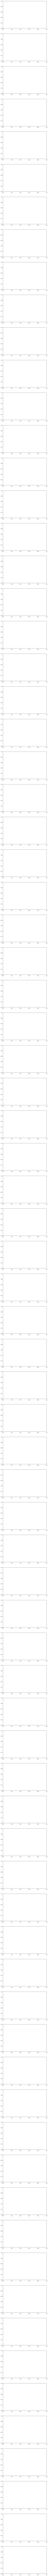

In [35]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Calculate the number of plots needed based on the number of observation directories
num_plots = len(directories)

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))
obs_fil=[]

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    obs_fil.append(obs_id)
    # Iterate over the filters
    for filterr in filters:
        if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                obs_fil.append(filterr)
        for radius in radii:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                mags = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")[1].data['MAG'].mean() 
                obs_fil.append(mags)
    print(obs_fil)
    obs_fil=[]

In [34]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Initialize an empty list to store observation data
obs_data = []

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # Check if the file exists for the given filter
        if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radii[0])}00_{obs_id}_noapcorr.fits"):
            # Create a dictionary to store data for this observation
            obs_entry = {'Observation ID': obs_id, 'Filter': filterr}
            
            # Iterate over the radii
            for radius in radii:
                # Check if the file exists for the given radius
                if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                    # Open the FITS file and extract the magnitude
                    fits_data = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")[1].data
                    magnitude = np.mean(fits_data['MAG'])
                    
                    # Add the magnitude to the observation entry
                    obs_entry[f'Magnitude_{radius}'] = magnitude
            
            # Append the observation entry to the list
            obs_data.append(obs_entry)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(obs_data)

# Display the DataFrame
print(df)


   Observation ID Filter  Magnitude_5.0  Magnitude_7.0  Magnitude_10.0  \
0     00096107001    um2      99.000000      99.000000       99.000000   
1     00096107002    uw1      15.612621      15.541766       15.479832   
2     00096107003    uw2      43.584927      43.547146       43.515667   
3     00096107004    uw1      15.683937      15.609244       15.544640   
4     00096107004    um2      16.005682      15.964205       15.920113   
..            ...    ...            ...            ...             ...   
85    00096132011    uw1      15.386154      15.301658       15.219585   
86    00096133001    uw2      12.840733      12.778748       12.730755   
87    00096133001    um2      12.824534      12.768772       12.723343   
88    00096133002    uw2      12.840044      12.767289       12.715815   
89    00096133003    uw1      12.859356      12.811562       12.763009   

    Magnitude_15.0  Magnitude_20.0  Magnitude_25.0  Magnitude_30.0  \
0        99.000000       99.000000       

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

   Observation ID Filter  Magnitude_5.0  Magnitude_7.0  Magnitude_10.0  \
0     00096107001    um2      99.000000      99.000000       99.000000   
1     00096107002    uw1      15.612621      15.541766       15.479832   
2     00096107003    uw2      43.584927      43.547146       43.515667   
3     00096107004    uw1      15.683937      15.609244       15.544640   
4     00096107004    um2      16.005682      15.964205       15.920113   
5     00096107005    uw2      16.157837      16.092096       16.037790   
6     00096107005    uuu      15.661333      15.573935       15.498823   
7     00096108001    uw1      14.983556      14.764066       14.514386   
8     00096108001    uw2      15.439644      15.217629       14.989418   
9     00096108001    um2      15.564168      15.328908       15.100932   
10    00096108001    uuu      14.524796      14.298169       14.029534   
11    00096109001    um2      15.004698      14.939078       14.878189   
12    00096110001    um2      15.43595

In [40]:
df.to_csv('SWIFT UV Magnitudes.csv',index=False)

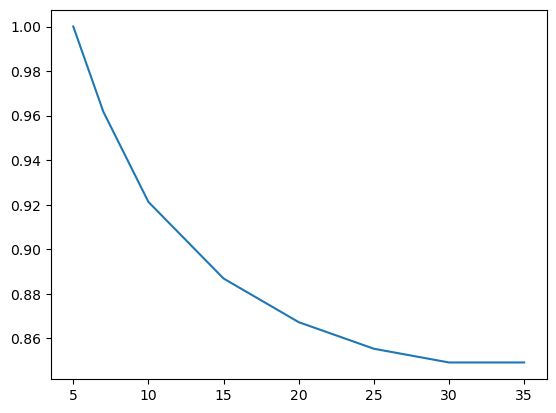

In [68]:
radii = [5,7,10,15,20,25,30,35]
ap_corr = [1.0000589,0.96177113,0.9212405,0.8868356,0.8672219,0.85528505,0.8491131,0.84911263]
plt.plot(radii,ap_corr)